pivot table is a multidimensional version of GroupBy aggregation
more straightforward than 

##### Motivating Pivot Tables

- use database of passengers on Titanic available through Seaborn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic.head()

#contains information of each passenger including
# gender, age, class, fare paid... etc

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


##### Pivot Tables by Hand

#might begin by grouping it according to gender, survival status

In [4]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [5]:
#groupby class and gender
#select survival column 
#apply a mean aggregate
#combing the resulting groups
#unstack the hierachical index to reveal the hidden multi-d

titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [6]:
titanic.groupby(['sex','class'])[['survived']].aggregate('mean').unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

##### Pivot Table Syntax

In [8]:
titanic.pivot_table('survived',index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


##### Multilevel pivot tables

grouping in pivot tables are specified with multiple levels and via a number of options

In [9]:
#bin using the pd.cut function

age = pd.cut(titanic['age'],[0, 18, 80])
titanic.pivot_table('survived',['sex', age],'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [10]:
#use pd.qcut to automatically compute quantiles

fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age],[fare,'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

##### Additional Pivot Table options

call signature as of Pandas

DataFrame.pivot_table(data, value = None, columns = None,
                     aggfunc = 'mean', fill_value = None,
                     margins = False, dropna = True,
                     margins_name = 'All')

fill_value and dropna are for missing data

aggfunc keyword which is mean by default
- 'sum', ' mean', 'count', 'min', 'max'...etc
- also can use np.sum(), min(), sum()
- can be a dictionary mapping a column

In [11]:
titanic.pivot_table(index='sex', columns='class',
                   aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [12]:
#compute totals along each grouping
#done using margins keyword

titanic.pivot_table('survived', index='sex', columns='class', margins=True)

#margins = True, will add the All column at the end
# margins_name keyword which defaults to 'All'

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [13]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True, margins_name='new name')

#margins = True, will add the All column at the end
# margins_name keyword which defaults to 'All'titanic.pivot_table('survived', index='sex', columns='class', margins=True)

#margins = True, will add the All column at the end
# margins_name keyword which defaults to 'All'

class,First,Second,Third,new name
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
new name,0.629630,0.472826,0.242363,0.383838


##### Example: Birthrate Date

- look at available data on births in USA

In [14]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [15]:
# add a decade column and take a look at male and female births as a function of decade

births['decade']= 10* (births['year']//10)
births.pivot_table('births', index='decade', columns ='gender',aggfunc='sum')

#immediately see that male births outnumber female births

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

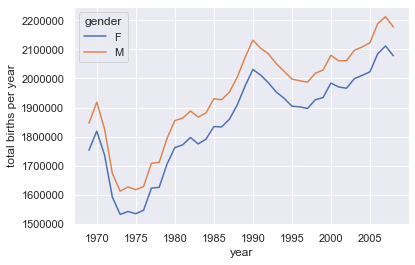

In [16]:
import matplotlib.pyplot as plt
sns.set() #use Seaborn styles
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()
plt.ylabel('total births per year')

#with a simple pivot table and plot() method
#see the annual trend in births by gender

In [27]:
##### Further Data Exploration

births = pd.read_csv('births.csv')
quartiles = np.percentile(births['births'],[25,50,75])
mu = quartiles[1]
sig = 0.74 *(quartiles[2] - quartiles[0])

#0.74 comes from interquartile range of Gaussian distribution

births = births.query('(births> @mu - 5*@sig) & (births< @mu + 5*@sig)')

#set the day column to integers
#string become some columns in dataset contained the value ' null'

#set 'day' column to integer: originally a string due to nulls
births['day'] =births['day'].astype(int)

#create a datetime index from the year, month, day

births.index = pd.to_datetime(10000 * births.year +
                            100 * births.month +
                            births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

# import matplotlib.pyplot as plt
# import matplotlib as mpl

births.pivot_table('births', index='dayofweek',columns='decade').plot()

plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs','Fri', 'Sat','Sun'])
plt.ylabel('mean births by day')

KeyError: 'decade'

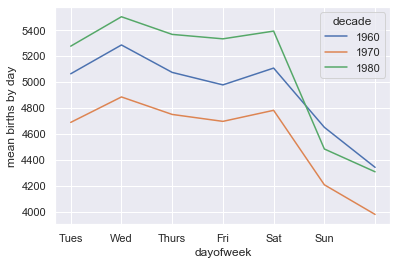

In [29]:
births['decade']= 10* (births['year']//10)
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
 columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');